<a href="https://colab.research.google.com/github/ishitha1611/Training/blob/main/TrainingDay27%2628%2629%2630.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"/content/Wholesale customers data.csv")


In [3]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.drop(["Channel","Region"],axis=1,inplace=True)
array=df.values


In [6]:

stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [7]:
import scipy.cluster.hierarchy as sch

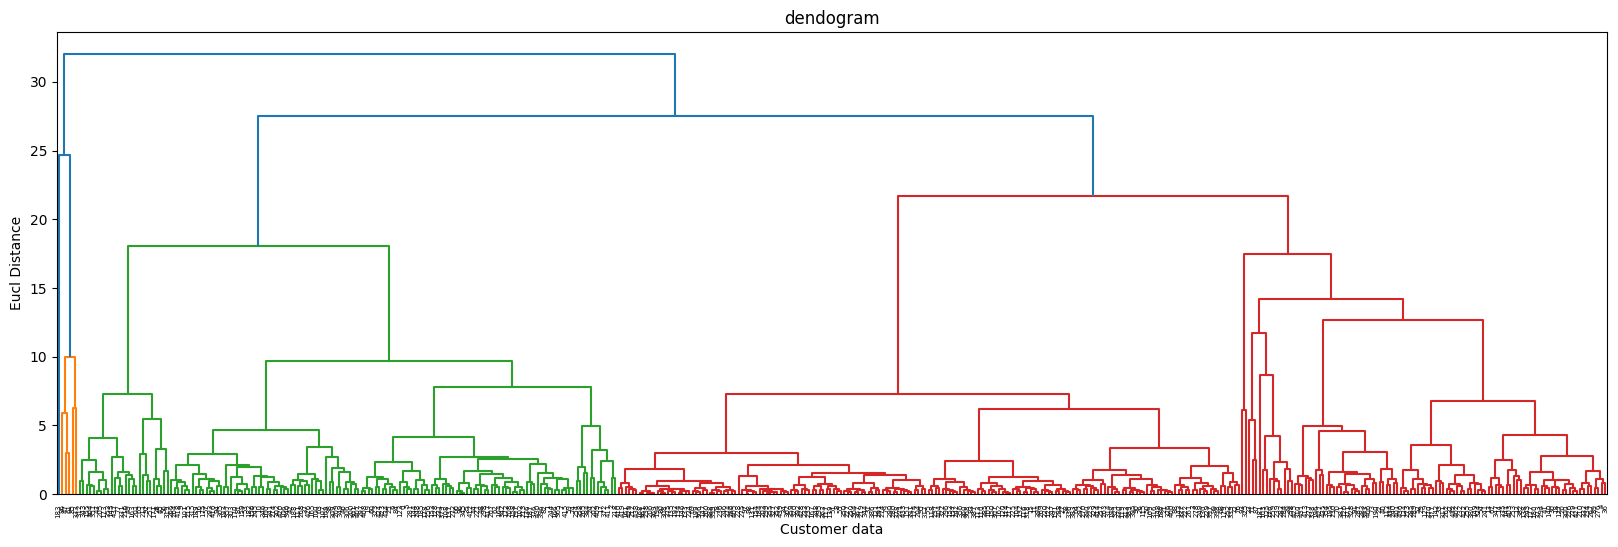

In [8]:
plt.figure(figsize=(20,6))
dendo = sch.dendrogram(sch.linkage(X,method="ward"))
plt.title('dendogram')
plt.xlabel('Customer data')
plt.ylabel('Eucl Distance')
plt.show()

In [9]:
len(set(dendo['color_list']))-1

3

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
group = AgglomerativeClustering(n_clusters=3)
group.fit_predict(X)

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [12]:
cluster = group.fit_predict(X)
cluster.shape

(440,)

In [13]:
from sklearn.metrics import silhouette_score
silhouette_score(X,cluster)

0.2646091480214908

In [14]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [15]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(2,11):
  kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [16]:
wcss

[2266.9552665832457,
 1644.0598512347563,
 1326.6746082135523,
 1070.2551995135614,
 989.3326418885056,
 856.7070228388113,
 791.8280762163158,
 710.1943394067521,
 668.22250548469]

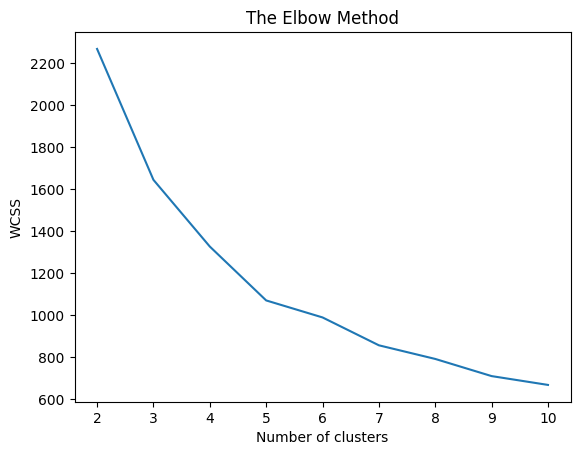

In [17]:
plt.plot(range(2,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [18]:
group_num=pd.DataFrame(cluster,columns=['Group'])
group_num

,Group
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [26]:
model = KMeans(n_clusters=5,random_state=309)
groups = model.fit_predict(X)

In [27]:
groups

array([2, 0, 0, 2, 4, 2, 2, 2, 2, 0, 0, 2, 4, 0, 0, 2, 0, 2, 2, 2, 2, 2,
       4, 0, 0, 2, 2, 2, 0, 4, 2, 2, 2, 4, 2, 0, 4, 0, 0, 4, 4, 2, 0, 0,
       0, 0, 0, 3, 0, 0, 2, 2, 4, 0, 2, 2, 3, 0, 2, 2, 2, 3, 2, 0, 2, 3,
       2, 0, 2, 2, 4, 0, 2, 4, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 3, 3, 4,
       2, 4, 2, 2, 3, 4, 0, 2, 2, 2, 2, 2, 0, 0, 2, 4, 2, 2, 0, 0, 2, 0,
       2, 0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 4, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 0, 2, 2, 2, 4, 2, 2, 2, 2,
       2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 2, 0, 2, 0,
       4, 2, 2, 2, 2, 4, 0, 1, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 4, 4, 0,
       2, 2, 0, 0, 4, 2, 2, 0, 2, 2, 2, 0, 2, 3, 2, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 3, 2, 4, 0, 4, 2, 2, 4, 4, 2, 2, 2, 2,
       0, 0, 0, 2, 0, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2,

In [28]:
groups.shape

(440,)

In [32]:
group_num=pd.DataFrame(groups,columns=['Group'])
group_num

,Group
0,2
1,0
2,0
3,2
4,4
...,...
435,4
436,4
437,0
438,2


In [34]:
cust_kmeans_data=pd.concat([df,group_num],axis=1)
cust_kmeans_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,4
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,4
436,39228,1431,764,4510,93,2346,4
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,2


In [36]:
cust_kmeans_data[cust_kmeans_data['Group']==4]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Group
4,22615,5410,7198,3915,1777,5185,4
12,31714,12319,11757,287,3881,2931,4
22,31276,1917,4469,9408,2381,4334,4
29,43088,2100,2609,1200,1107,823,4
33,29729,4786,7326,6130,361,1083,4
...,...,...,...,...,...,...,...
425,11243,2408,2593,15348,108,1886,4
427,31012,16687,5429,15082,439,1163,4
431,8533,5506,5160,13486,1377,1498,4
435,29703,12051,16027,13135,182,2204,4


In [35]:
silhouette_score(X,groups)

0.3676564632042091

# DBSCAN

In [37]:
from sklearn.cluster import DBSCAN

In [38]:
db_model = DBSCAN(eps=3.2, min_samples=10)
db_model.fit(X)

DBSCAN(eps=3.2, min_samples=10)

In [40]:
label=db_model.labels_
label

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1, -1,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

In [41]:
silhouette_score(X,label)

0.7738898379253679

In [45]:
cl=pd.DataFrame(db_model.labels_,columns=['cluster'])
df_cluster=pd.concat([df,cl],axis=1)
df_cluster

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,0
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,0
3,13265,1196,4221,6404,507,1788,0
4,22615,5410,7198,3915,1777,5185,0
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,0
436,39228,1431,764,4510,93,2346,0
437,14531,15488,30243,437,14841,1867,0
438,10290,1981,2232,1038,168,2125,0


In [47]:
df_cluster[df_cluster['cluster']==-1]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
23,26373,36423,22019,5154,4337,16523,-1
47,44466,54259,55571,7782,24171,6465,-1
61,35942,38369,59598,3254,26701,2017,-1
85,16117,46197,92780,1026,40827,2944,-1
86,22925,73498,32114,987,20070,903,-1
93,11314,3090,2062,35009,71,2698,-1
181,112151,29627,18148,16745,4948,8550,-1
183,36847,43950,20170,36534,239,47943,-1
325,32717,16784,13626,60869,1272,5609,-1
333,8565,4980,67298,131,38102,1215,-1
